In [80]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [81]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
url_selic = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv"
df_selic = pd.read_csv(url_selic, sep=';', usecols=[0, 1], index_col=0, parse_dates=True)
df_selic.columns = ['Taxa_Selic_Anual']
df_selic['Taxa_Selic_Anual'] = df_selic['Taxa_Selic_Anual'].str.replace(',', '.')
df_selic['Taxa_Selic_Anual'] = pd.to_numeric(df_selic['Taxa_Selic_Anual'], errors='coerce')
df_selic = df_selic.loc[df_selic.index >= '2022-01-01']
df_selic

<ipython-input-82-06e3bcf7a05b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_selic = pd.read_csv(url_selic, sep=';', usecols=[0, 1], index_col=0, parse_dates=True)


,Taxa_Selic_Anual
data,
2022-03-01,0.034749
2022-04-01,0.034749
2022-05-01,0.034749
2022-06-01,0.034749
2022-07-01,0.034749
...,...
2023-12-06,0.050788
2023-06-13,0.050788
2023-06-14,0.050788


In [83]:
dias_uteis = 252
df_selic['Rentabilidade_Diaria'] = (1 + df_selic['Taxa_Selic_Anual'])**(1 / dias_uteis) - 1
df_selic

,Taxa_Selic_Anual,Rentabilidade_Diaria
data,,
2022-03-01,0.034749,0.000136
2022-04-01,0.034749,0.000136
2022-05-01,0.034749,0.000136
2022-06-01,0.034749,0.000136
2022-07-01,0.034749,0.000136
...,...,...
2023-12-06,0.050788,0.000197
2023-06-13,0.050788,0.000197
2023-06-14,0.050788,0.000197


In [84]:
df_selic['Rentabilidade_Acumulada'] = (1 + df_selic['Rentabilidade_Diaria']).cumprod()
df_selic

,Taxa_Selic_Anual,Rentabilidade_Diaria,Rentabilidade_Acumulada
data,,,
2022-03-01,0.034749,0.000136,1.000136
2022-04-01,0.034749,0.000136,1.000271
2022-05-01,0.034749,0.000136,1.000407
2022-06-01,0.034749,0.000136,1.000542
2022-07-01,0.034749,0.000136,1.000678
...,...,...,...
2023-12-06,0.050788,0.000197,1.069222
2023-06-13,0.050788,0.000197,1.069432
2023-06-14,0.050788,0.000197,1.069643


In [89]:
df_selic.iloc[50:100]

,Taxa_Selic_Anual,Rentabilidade_Diaria,Rentabilidade_Acumulada
data,,,
2022-03-16,0.040168,0.000156,1.007522
2022-03-17,0.043739,0.000170,1.007693
2022-03-18,0.043739,0.000170,1.007864
2022-03-21,0.043739,0.000170,1.008035
2022-03-22,0.043739,0.000170,1.008206
2022-03-23,0.043739,0.000170,1.008378
2022-03-24,0.043739,0.000170,1.008549
2022-03-25,0.043739,0.000170,1.008720
2022-03-28,0.043739,0.000170,1.008892


<Axes: xlabel='data'>

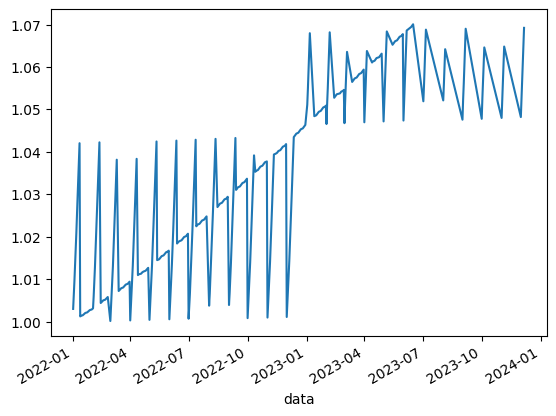

In [87]:
df_selic['Rentabilidade_Acumulada'].plot()

In [85]:
acao = 'VALE3.SA'
df_acao = yf.download(acao, start='2022-01-01')
df_acao['Rentabilidade_Diaria'] = df_acao['Adj Close'].pct_change()
df_acao = df_acao.dropna()
df_acao = df_acao.loc[df_acao.index >= '2022-01-01']
df_acao = df_acao[['Rentabilidade_Diaria']]
df_acao['Rentabilidade_Acumulada'] = (1 + df_acao['Rentabilidade_Diaria']).cumprod()
df_acao

[*********************100%***********************]  1 of 1 completed


,Rentabilidade_Diaria,Rentabilidade_Acumulada
Date,,
2022-01-04,-0.011795,0.988205
2022-01-05,0.009471,0.997564
2022-01-06,0.020177,1.017692
2022-01-07,0.058201,1.076923
2022-01-10,-0.011905,1.064103
...,...,...
2023-06-12,-0.018139,0.963822
2023-06-13,0.010578,0.974017
2023-06-14,0.017544,0.991105


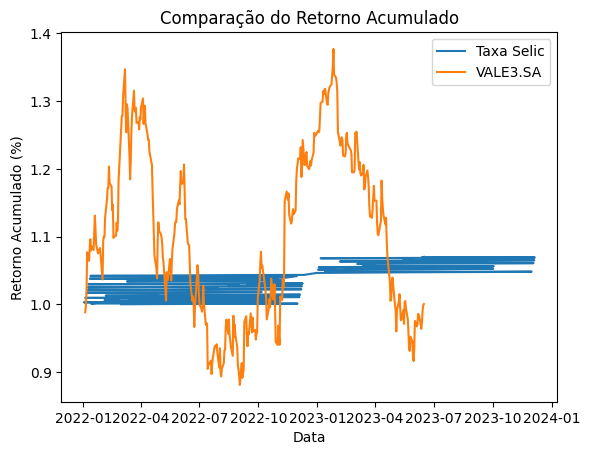

In [86]:
plt.plot(df_selic.index, df_selic['Rentabilidade_Acumulada'], label='Taxa Selic')
plt.plot(df_acao.index, df_acao['Rentabilidade_Acumulada'], label=acao)
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado (%)')
plt.title('Comparação do Retorno Acumulado')
plt.legend()
plt.show()